# Credit card fraud detection

## Imports

In [1]:
# Dataset
import pandas as pd
import numpy as np

# Vectorizing and spliting
from sklearn.model_selection import train_test_split

# Classifications
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Preprocessing
from sklearn.preprocessing import MinMaxScaler

from functions.create_classifier import create_classifier, plot_confusion_matrix 
from functions.test_hyperparameters import test_hyperparameters 
from functions.balance_dataset import balance_dataset 
import random

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

## Config

In [2]:
SEED_VAL = 42
random.seed(SEED_VAL)
np.random.seed(SEED_VAL)

## Read files

In [4]:
# !unzip '../data/creditcard.zip' -d 'data'

In [3]:
df = pd.read_csv("../data/creditcard.csv")

In [4]:
df = df.replace(np.nan, 0)

In [5]:
y_df = df['Class'][:10000]

df = df.drop(['Time', 'Class', 'Amount'], axis=1)
X_df = df[:10000]

## Split dataset

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=SEED_VAL)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=SEED_VAL)

print('Shape of train dataset', X_train.shape)
print('Shape of validation dataset', X_val.shape)
print('Shape of test dataset', X_test.shape)

Shape of train dataset (6000, 28)
Shape of validation dataset (2000, 28)
Shape of test dataset (2000, 28)


## Balance dataset - choose %

Analyzing the proportion of fraudulent samples:

In [13]:
y_train.value_counts(normalize=True)

0    0.996333
1    0.003667
Name: Class, dtype: float64

The fraudulent samples are approximately 4% of the dataset, so we are dealing with an unbalanced dataset.

Define not balanced dataset

In [14]:
X_train_not_balanced_04 = X_train
y_train_not_balanced_04 = y_train

##### Define balanced dataset using oversampling

In [9]:
X_train_balanced_10, y_train_balanced_10 = balance_dataset('oversampling', X_train, y_train, 0.112) # 10% fraud
X_train_balanced_20, y_train_balanced_20 = balance_dataset('oversampling', X_train, y_train, 0.251) # 20% fraud
X_train_balanced_30, y_train_balanced_30 = balance_dataset('oversampling', X_train, y_train, 0.43)  # 30% fraud
X_train_balanced_40, y_train_balanced_40 = balance_dataset('oversampling', X_train, y_train, 0.667) # 40% fraud
X_train_balanced_50, y_train_balanced_50 = balance_dataset('oversampling', X_train, y_train, 1)     # 50% fraud

print('10%:')
print('X_train.shape', X_train_balanced_10.shape)

print('\n20%:')
print('X_train.shape', X_train_balanced_20.shape)

print('\n30%:')
print('X_train.shape', X_train_balanced_30.shape)

print('\n40%:')
print('X_train.shape', X_train_balanced_40.shape)

print('\n50%:')
print('X_train.shape', X_train_balanced_50.shape)

10%:
X_train.shape (6647, 28)

20%:
X_train.shape (7478, 28)

30%:
X_train.shape (8548, 28)

40%:
X_train.shape (9965, 28)

50%:
X_train.shape (11956, 28)


In [12]:
y_train_balanced_50.value_counts(normalize=True)

0    0.5
1    0.5
Name: Class, dtype: float64

##### Define balanced dataset using undersampling

In [15]:
X_train_balanced_us_10, y_train_balanced_us_10 = balance_dataset('undersampling', X_train, y_train, 0.112) # 10% fraud
X_train_balanced_us_20, y_train_balanced_us_20 = balance_dataset('undersampling', X_train, y_train, 0.251) # 20% fraud
X_train_balanced_us_30, y_train_balanced_us_30 = balance_dataset('undersampling', X_train, y_train, 0.43)  # 30% fraud
X_train_balanced_us_40, y_train_balanced_us_40 = balance_dataset('undersampling', X_train, y_train, 0.667) # 40% fraud
X_train_balanced_us_50, y_train_balanced_us_50 = balance_dataset('undersampling', X_train, y_train, 1)     # 50% fraud

print('10%:')
print('X_train.shape', X_train_balanced_us_10.shape)

print('\n20%:')
print('X_train.shape', X_train_balanced_us_20.shape)

print('\n30%:')
print('X_train.shape', X_train_balanced_us_30.shape)

print('\n40%:')
print('X_train.shape', X_train_balanced_us_40.shape)

print('\n50%:')
print('X_train.shape', X_train_balanced_us_50.shape)

10%:
X_train.shape (218, 28)

20%:
X_train.shape (109, 28)

30%:
X_train.shape (73, 28)

40%:
X_train.shape (54, 28)

50%:
X_train.shape (44, 28)


In [16]:
y_train_balanced_us_50.value_counts(normalize=True)

0    0.5
1    0.5
Name: Class, dtype: float64

#### Normalize data for Naive Bayes

In [17]:
scaler = MinMaxScaler()

# Train
X_train_not_balanced_04_normalized = scaler.fit(X_train_not_balanced_04).transform(X_train_not_balanced_04)

X_train_balanced_10_normalized = scaler.fit(X_train_balanced_10).transform(X_train_balanced_10)
X_train_balanced_20_normalized = scaler.fit(X_train_balanced_20).transform(X_train_balanced_20)
X_train_balanced_30_normalized = scaler.fit(X_train_balanced_30).transform(X_train_balanced_30)
X_train_balanced_40_normalized = scaler.fit(X_train_balanced_40).transform(X_train_balanced_40)
X_train_balanced_50_normalized = scaler.fit(X_train_balanced_50).transform(X_train_balanced_50)

X_train_balanced_us_10_normalized = scaler.fit(X_train_balanced_us_10).transform(X_train_balanced_us_10)
X_train_balanced_us_20_normalized = scaler.fit(X_train_balanced_us_20).transform(X_train_balanced_us_20)
X_train_balanced_us_30_normalized = scaler.fit(X_train_balanced_us_30).transform(X_train_balanced_us_30)
X_train_balanced_us_40_normalized = scaler.fit(X_train_balanced_us_40).transform(X_train_balanced_us_40)
X_train_balanced_us_50_normalized = scaler.fit(X_train_balanced_us_50).transform(X_train_balanced_us_50)

# Validation
X_val_normalized = scaler.fit(X_val).transform(X_val)

# Test
X_test_normalized = scaler.fit(X_test).transform(X_test)

#### Classification - original data (0.04%)

##### Test hyperparameters

In [21]:
test_hyperparameters('Naive Bayes', X_val_normalized, y_val)
test_hyperparameters('SVM', X_val, y_val)
test_hyperparameters('Random Forest', X_val, y_val)
test_hyperparameters('Multilayer Perceptron', X_val, y_val)

Best hyperparameters based on f1 score for Naive Bayes: {'alpha': 1}
Best hyperparameters based on f1 score for SVM: {'kernel': 'poly', 'C': 10}
Best hyperparameters based on f1 score for Random Forest: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 100, 'criterion': 'entropy'}
Best hyperparameters based on f1 score for Multilayer Perceptron: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (80,), 'alpha': 0.0001, 'activation': 'tanh'}


##### Classificate

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      0.00      0.00         4

    accuracy                           1.00      2000
   macro avg       1.00      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


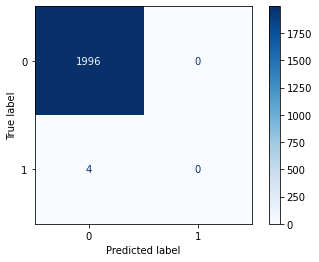

In [18]:
nb_clf = MultinomialNB(alpha=1)

y_pred = create_classifier(nb_clf, X_train_not_balanced_04_normalized, y_train_not_balanced_04, 
                          X_val_normalized, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_val_normalized, y_val)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       0.80      1.00      0.89         4

    accuracy                           1.00      2000
   macro avg       0.90      1.00      0.94      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


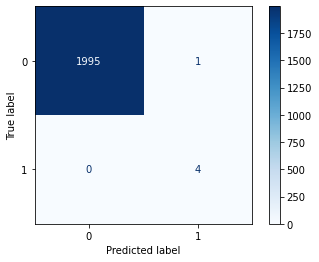

In [24]:
svm_clf = SVC(kernel='poly', C=10, random_state=SEED_VAL)

y_pred = create_classifier(svm_clf, X_train_not_balanced_04, y_train_not_balanced_04, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_val, y_val)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      1.00      1.00         4

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


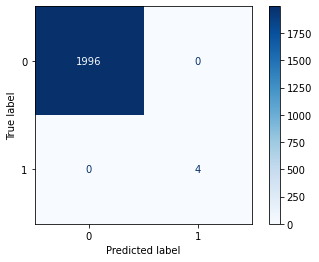

In [25]:
rf_clf = RandomForestClassifier(n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features='auto', max_depth=100, criterion='entropy', random_state=SEED_VAL)

y_pred = create_classifier(rf_clf, X_train_not_balanced_04, y_train_not_balanced_04, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_val, y_val)

Multilayer Perceptron

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      0.75      0.86         4

    accuracy                           1.00      2000
   macro avg       1.00      0.88      0.93      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


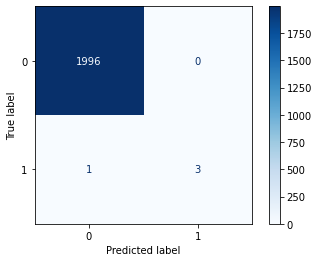

In [26]:
mlp_clf = MLPClassifier(solver='adam', learning_rate='constant', hidden_layer_sizes=(80,), alpha=0.0001, activation='tanh', random_state=SEED_VAL)

y_pred = create_classifier(mlp_clf, X_train_not_balanced_04, y_train_not_balanced_04, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(mlp_clf, X_val, y_val)

#### Classification - oversampling data

##### Classificate (10% fraud)

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      0.25      0.40         4

    accuracy                           1.00      2000
   macro avg       1.00      0.62      0.70      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


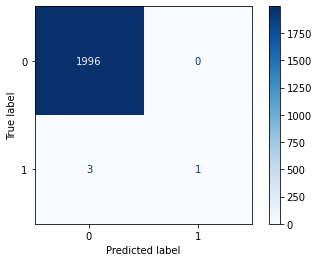

In [27]:
nb_clf = MultinomialNB(alpha=1)

y_pred = create_classifier(nb_clf, X_train_balanced_10_normalized, y_train_balanced_10, 
                          X_val_normalized, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_val_normalized, y_val)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       0.80      1.00      0.89         4

    accuracy                           1.00      2000
   macro avg       0.90      1.00      0.94      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


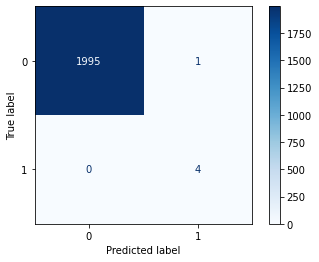

In [28]:
svm_clf = SVC(kernel='poly', C=10, random_state=SEED_VAL)

y_pred = create_classifier(svm_clf, X_train_balanced_10, y_train_balanced_10, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_val, y_val)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      1.00      1.00         4

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


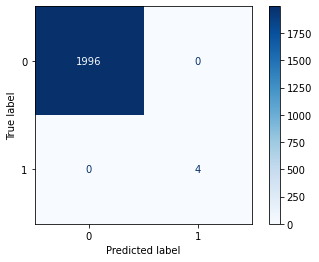

In [29]:
rf_clf = RandomForestClassifier(n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features='auto', max_depth=100, criterion='entropy', random_state=SEED_VAL)

y_pred = create_classifier(rf_clf, X_train_balanced_10, y_train_balanced_10, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_val, y_val)

Multilayer Perceptron

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       0.80      1.00      0.89         4

    accuracy                           1.00      2000
   macro avg       0.90      1.00      0.94      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


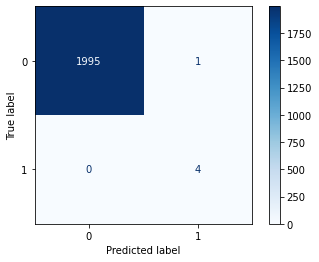

In [30]:
mlp_clf = MLPClassifier(solver='adam', learning_rate='constant', hidden_layer_sizes=(80,), alpha=0.0001, activation='tanh', random_state=SEED_VAL)

y_pred = create_classifier(mlp_clf, X_train_balanced_10, y_train_balanced_10, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(mlp_clf, X_val, y_val)

##### Classificate (20% fraud)

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      0.50      0.67         4

    accuracy                           1.00      2000
   macro avg       1.00      0.75      0.83      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


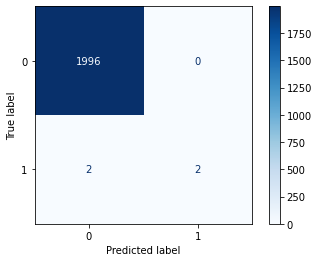

In [31]:
nb_clf = MultinomialNB(alpha=1)

y_pred = create_classifier(nb_clf, X_train_balanced_20_normalized, y_train_balanced_20, 
                          X_val_normalized, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_val_normalized, y_val)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      1.00      1.00         4

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


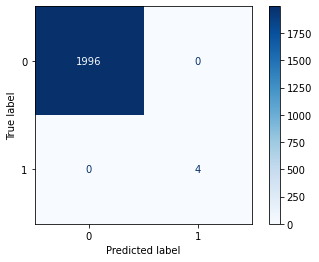

In [32]:
svm_clf = SVC(kernel='poly', C=10, random_state=SEED_VAL)

y_pred = create_classifier(svm_clf, X_train_balanced_20, y_train_balanced_20, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_val, y_val)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      1.00      1.00         4

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


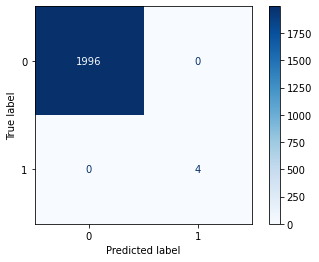

In [33]:
rf_clf = RandomForestClassifier(n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features='auto', max_depth=100, criterion='entropy', random_state=SEED_VAL)

y_pred = create_classifier(rf_clf, X_train_balanced_20, y_train_balanced_20, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_val, y_val)

Multilayer Perceptron

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       0.80      1.00      0.89         4

    accuracy                           1.00      2000
   macro avg       0.90      1.00      0.94      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


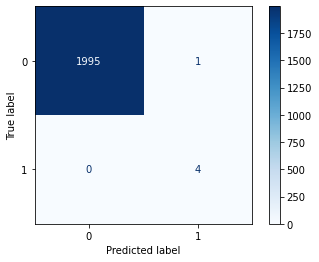

In [34]:
mlp_clf = MLPClassifier(solver='adam', learning_rate='constant', hidden_layer_sizes=(80,), alpha=0.0001, activation='tanh', random_state=SEED_VAL)

y_pred = create_classifier(mlp_clf, X_train_balanced_20, y_train_balanced_20, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(mlp_clf, X_val, y_val)

##### Classificate (30% fraud)

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      0.75      0.86         4

    accuracy                           1.00      2000
   macro avg       1.00      0.88      0.93      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


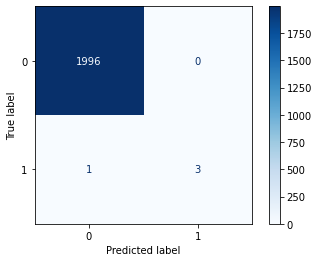

In [35]:
nb_clf = MultinomialNB(alpha=1)

y_pred = create_classifier(nb_clf, X_train_balanced_30_normalized, y_train_balanced_30, 
                          X_val_normalized, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_val_normalized, y_val)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      1.00      1.00         4

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


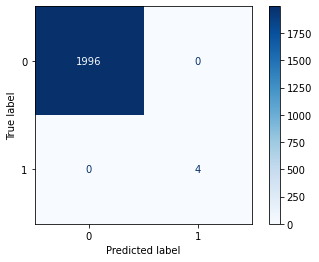

In [36]:
svm_clf = SVC(kernel='poly', C=10, random_state=SEED_VAL)

y_pred = create_classifier(svm_clf, X_train_balanced_30, y_train_balanced_30, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_val, y_val)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      1.00      1.00         4

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


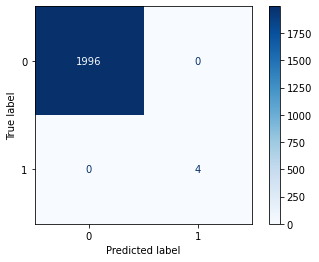

In [37]:
rf_clf = RandomForestClassifier(n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features='auto', max_depth=100, criterion='entropy', random_state=SEED_VAL)

y_pred = create_classifier(rf_clf, X_train_balanced_30, y_train_balanced_30, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_val, y_val)

Multilayer Perceptron

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       0.80      1.00      0.89         4

    accuracy                           1.00      2000
   macro avg       0.90      1.00      0.94      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


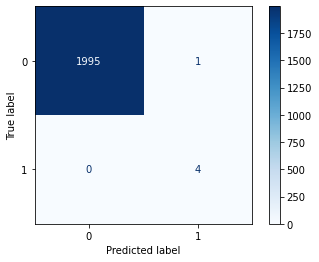

In [38]:
mlp_clf = MLPClassifier(solver='adam', learning_rate='constant', hidden_layer_sizes=(80,), alpha=0.0001, activation='tanh', random_state=SEED_VAL)

y_pred = create_classifier(mlp_clf, X_train_balanced_30, y_train_balanced_30, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(mlp_clf, X_val, y_val)

##### Classificate (40% fraud)

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      1.00      1.00         4

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


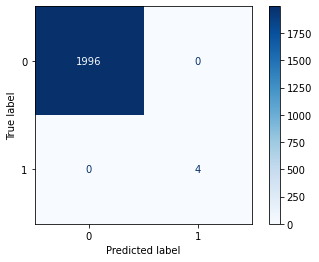

In [39]:
nb_clf = MultinomialNB(alpha=1)

y_pred = create_classifier(nb_clf, X_train_balanced_40_normalized, y_train_balanced_40, 
                          X_val_normalized, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_val_normalized, y_val)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       0.80      1.00      0.89         4

    accuracy                           1.00      2000
   macro avg       0.90      1.00      0.94      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


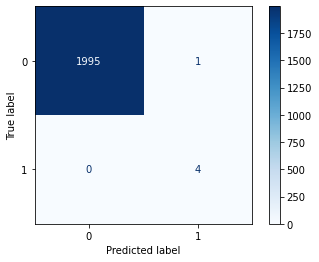

In [40]:
svm_clf = SVC(kernel='poly', C=10, random_state=SEED_VAL)

y_pred = create_classifier(svm_clf, X_train_balanced_40, y_train_balanced_40, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_val, y_val)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      1.00      1.00         4

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


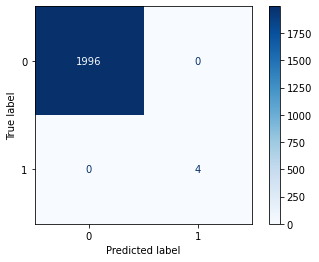

In [41]:
rf_clf = RandomForestClassifier(n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features='auto', max_depth=100, criterion='entropy', random_state=SEED_VAL)

y_pred = create_classifier(rf_clf, X_train_balanced_40, y_train_balanced_40, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_val, y_val)

Multilayer Perceptron

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       0.80      1.00      0.89         4

    accuracy                           1.00      2000
   macro avg       0.90      1.00      0.94      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


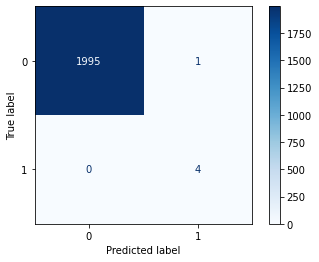

In [42]:
mlp_clf = MLPClassifier(solver='adam', learning_rate='constant', hidden_layer_sizes=(80,), alpha=0.0001, activation='tanh', random_state=SEED_VAL)

y_pred = create_classifier(mlp_clf, X_train_balanced_40, y_train_balanced_40, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(mlp_clf, X_val, y_val)

##### Classificate (50% fraud)

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       0.67      1.00      0.80         4

    accuracy                           1.00      2000
   macro avg       0.83      1.00      0.90      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


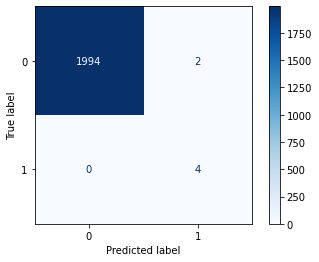

In [43]:
nb_clf = MultinomialNB(alpha=1)

y_pred = create_classifier(nb_clf, X_train_balanced_50_normalized, y_train_balanced_50, 
                          X_val_normalized, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_val_normalized, y_val)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       0.80      1.00      0.89         4

    accuracy                           1.00      2000
   macro avg       0.90      1.00      0.94      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


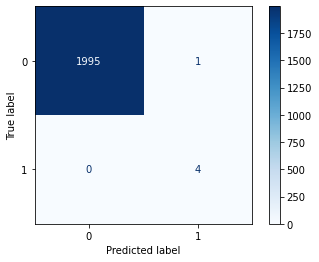

In [44]:
svm_clf = SVC(kernel='poly', C=10, random_state=SEED_VAL)

y_pred = create_classifier(svm_clf, X_train_balanced_50, y_train_balanced_50, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_val, y_val)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      1.00      1.00         4

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


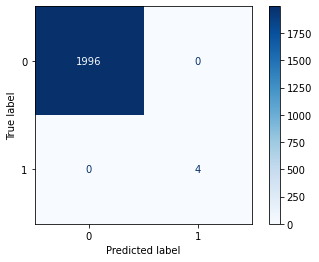

In [45]:
rf_clf = RandomForestClassifier(n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features='auto', max_depth=100, criterion='entropy', random_state=SEED_VAL)

y_pred = create_classifier(rf_clf, X_train_balanced_50, y_train_balanced_50, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_val, y_val)

Multilayer Perceptron

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       0.80      1.00      0.89         4

    accuracy                           1.00      2000
   macro avg       0.90      1.00      0.94      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


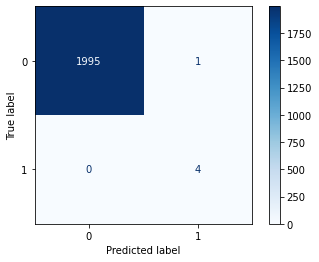

In [46]:
mlp_clf = MLPClassifier(solver='adam', learning_rate='constant', hidden_layer_sizes=(80,), alpha=0.0001, activation='tanh', random_state=SEED_VAL)

y_pred = create_classifier(mlp_clf, X_train_balanced_50, y_train_balanced_50, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(mlp_clf, X_val, y_val)

#### Classification - undersampling data

##### Classificate (10% fraud)

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      0.50      0.67         4

    accuracy                           1.00      2000
   macro avg       1.00      0.75      0.83      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


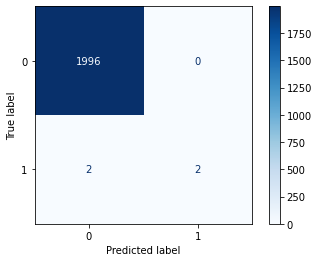

In [19]:
nb_clf = MultinomialNB(alpha=1)

y_pred = create_classifier(nb_clf, X_train_balanced_us_10_normalized, y_train_balanced_us_10, 
                          X_val_normalized, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_val_normalized, y_val) 

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       0.80      1.00      0.89         4

    accuracy                           1.00      2000
   macro avg       0.90      1.00      0.94      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


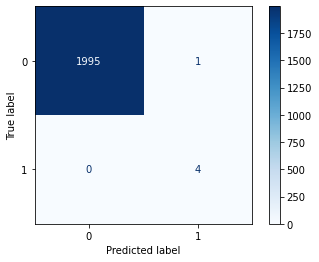

In [20]:
svm_clf = SVC(kernel='poly', C=10, random_state=SEED_VAL)

y_pred = create_classifier(svm_clf, X_train_balanced_us_10, y_train_balanced_us_10, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_val, y_val)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       0.80      1.00      0.89         4

    accuracy                           1.00      2000
   macro avg       0.90      1.00      0.94      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


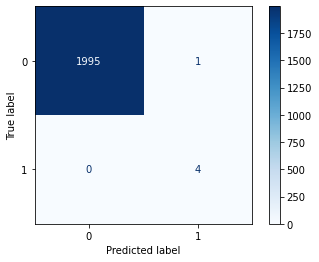

In [21]:
rf_clf = RandomForestClassifier(n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features='auto', max_depth=100, criterion='entropy', random_state=SEED_VAL)

y_pred = create_classifier(rf_clf, X_train_balanced_us_10, y_train_balanced_us_10, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_val, y_val)

Multilayer Perceptron

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1996
           1       0.14      1.00      0.25         4

    accuracy                           0.99      2000
   macro avg       0.57      0.99      0.62      2000
weighted avg       1.00      0.99      0.99      2000

Confusion Matrix: 


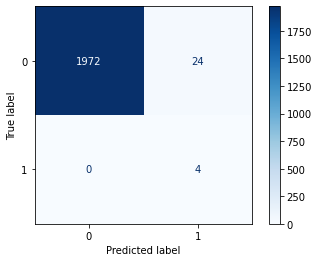

In [22]:
mlp_clf = MLPClassifier(solver='adam', learning_rate='constant', hidden_layer_sizes=(80,), alpha=0.0001, activation='tanh', random_state=SEED_VAL)

y_pred = create_classifier(mlp_clf, X_train_balanced_us_10, y_train_balanced_us_10, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(mlp_clf, X_val, y_val)

##### Classificate (20% fraud)

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      1.00      1.00         4

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


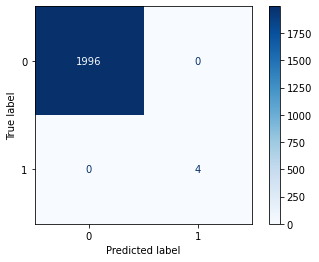

In [23]:
nb_clf = MultinomialNB(alpha=1)

y_pred = create_classifier(nb_clf, X_train_balanced_us_20_normalized, y_train_balanced_us_20, 
                          X_val_normalized, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_val_normalized, y_val)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       0.67      1.00      0.80         4

    accuracy                           1.00      2000
   macro avg       0.83      1.00      0.90      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


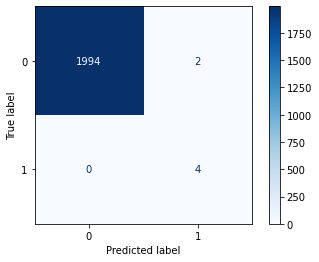

In [24]:
svm_clf = SVC(kernel='poly', C=10, random_state=SEED_VAL)

y_pred = create_classifier(svm_clf, X_train_balanced_us_20, y_train_balanced_us_20, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_val, y_val)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       0.80      1.00      0.89         4

    accuracy                           1.00      2000
   macro avg       0.90      1.00      0.94      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


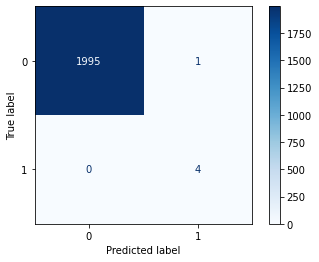

In [25]:
rf_clf = RandomForestClassifier(n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features='auto', max_depth=100, criterion='entropy', random_state=SEED_VAL)

y_pred = create_classifier(rf_clf, X_train_balanced_us_20, y_train_balanced_us_20, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_val, y_val)

Multilayer Perceptron

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1996
           1       0.03      1.00      0.06         4

    accuracy                           0.93      2000
   macro avg       0.51      0.97      0.51      2000
weighted avg       1.00      0.93      0.96      2000

Confusion Matrix: 


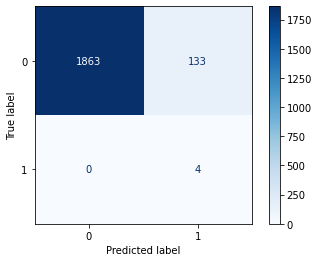

In [26]:
mlp_clf = MLPClassifier(solver='adam', learning_rate='constant', hidden_layer_sizes=(80,), alpha=0.0001, activation='tanh', random_state=SEED_VAL)

y_pred = create_classifier(mlp_clf, X_train_balanced_us_20, y_train_balanced_us_20, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(mlp_clf, X_val, y_val)

##### Classificate (30% fraud)

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       0.67      1.00      0.80         4

    accuracy                           1.00      2000
   macro avg       0.83      1.00      0.90      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


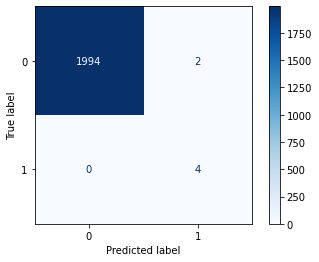

In [27]:
nb_clf = MultinomialNB(alpha=1)

y_pred = create_classifier(nb_clf, X_train_balanced_us_30_normalized, y_train_balanced_us_30, 
                          X_val_normalized, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_val_normalized, y_val)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      1.00      1.00         4

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


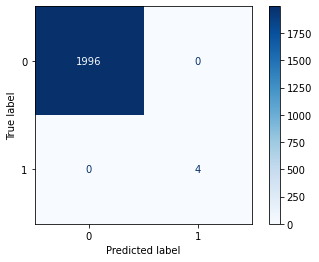

In [28]:
svm_clf = SVC(kernel='poly', C=10, random_state=SEED_VAL)

y_pred = create_classifier(svm_clf, X_train_balanced_us_30, y_train_balanced_us_30, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_val, y_val)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       0.80      1.00      0.89         4

    accuracy                           1.00      2000
   macro avg       0.90      1.00      0.94      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


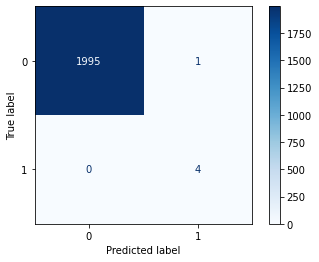

In [29]:
rf_clf = RandomForestClassifier(n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features='auto', max_depth=100, criterion='entropy', random_state=SEED_VAL)

y_pred = create_classifier(rf_clf, X_train_balanced_us_30, y_train_balanced_us_30, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_val, y_val)

Multilayer Perceptron

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1996
           1       0.03      1.00      0.07         4

    accuracy                           0.94      2000
   macro avg       0.52      0.97      0.52      2000
weighted avg       1.00      0.94      0.97      2000

Confusion Matrix: 


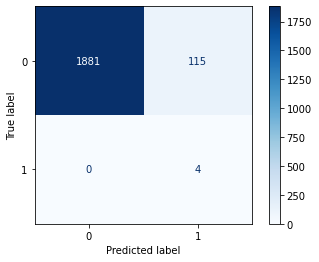

In [30]:
mlp_clf = MLPClassifier(solver='adam', learning_rate='constant', hidden_layer_sizes=(80,), alpha=0.0001, activation='tanh', random_state=SEED_VAL)

y_pred = create_classifier(mlp_clf, X_train_balanced_us_30, y_train_balanced_us_30, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(mlp_clf, X_val, y_val)

##### Classificate (40% fraud)

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1996
           1       0.07      1.00      0.13         4

    accuracy                           0.97      2000
   macro avg       0.53      0.99      0.56      2000
weighted avg       1.00      0.97      0.98      2000

Confusion Matrix: 


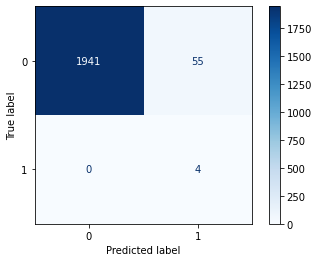

In [31]:
nb_clf = MultinomialNB(alpha=1)

y_pred = create_classifier(nb_clf, X_train_balanced_us_40_normalized, y_train_balanced_us_40, 
                          X_val_normalized, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_val_normalized, y_val)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      0.75      0.86         4

    accuracy                           1.00      2000
   macro avg       1.00      0.88      0.93      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


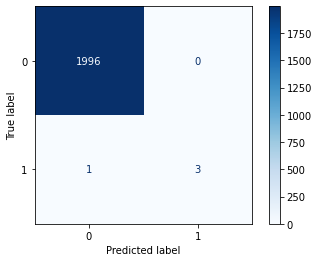

In [32]:
svm_clf = SVC(kernel='poly', C=10, random_state=SEED_VAL)

y_pred = create_classifier(svm_clf, X_train_balanced_us_40, y_train_balanced_us_40, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_val, y_val)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       0.67      1.00      0.80         4

    accuracy                           1.00      2000
   macro avg       0.83      1.00      0.90      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


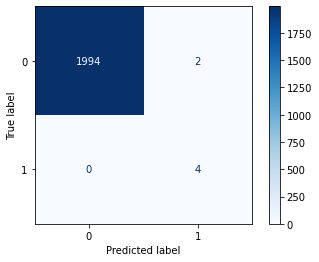

In [33]:
rf_clf = RandomForestClassifier(n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features='auto', max_depth=100, criterion='entropy', random_state=SEED_VAL)

y_pred = create_classifier(rf_clf, X_train_balanced_us_40, y_train_balanced_us_40, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_val, y_val)

Multilayer Perceptron

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1996
           1       0.02      0.75      0.04         4

    accuracy                           0.94      2000
   macro avg       0.51      0.84      0.51      2000
weighted avg       1.00      0.94      0.97      2000

Confusion Matrix: 


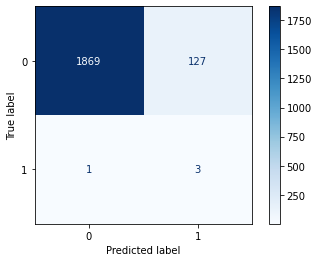

In [34]:
mlp_clf = MLPClassifier(solver='adam', learning_rate='constant', hidden_layer_sizes=(80,), alpha=0.0001, activation='tanh', random_state=SEED_VAL)

y_pred = create_classifier(mlp_clf, X_train_balanced_us_40, y_train_balanced_us_40, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(mlp_clf, X_val, y_val)

##### Classificate (50% fraud)

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.32      0.48      1996
           1       0.00      1.00      0.01         4

    accuracy                           0.32      2000
   macro avg       0.50      0.66      0.24      2000
weighted avg       1.00      0.32      0.48      2000

Confusion Matrix: 


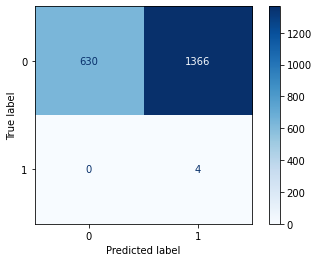

In [35]:
nb_clf = MultinomialNB(alpha=1)

y_pred = create_classifier(nb_clf, X_train_balanced_us_50_normalized, y_train_balanced_us_50, 
                          X_val_normalized, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_val_normalized, y_val)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      0.75      0.86         4

    accuracy                           1.00      2000
   macro avg       1.00      0.88      0.93      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


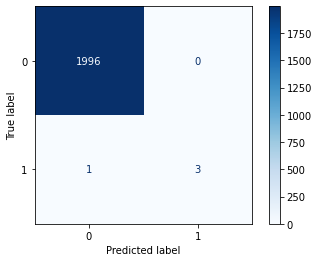

In [36]:
svm_clf = SVC(kernel='poly', C=10, random_state=SEED_VAL)

y_pred = create_classifier(svm_clf, X_train_balanced_us_50, y_train_balanced_us_50, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_val, y_val)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       0.67      1.00      0.80         4

    accuracy                           1.00      2000
   macro avg       0.83      1.00      0.90      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


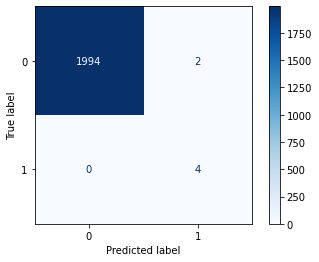

In [37]:
rf_clf = RandomForestClassifier(n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features='auto', max_depth=100, criterion='entropy', random_state=SEED_VAL)

y_pred = create_classifier(rf_clf, X_train_balanced_us_50, y_train_balanced_us_50, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_val, y_val)

Multilayer Perceptron

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1996
           1       0.02      1.00      0.04         4

    accuracy                           0.90      2000
   macro avg       0.51      0.95      0.49      2000
weighted avg       1.00      0.90      0.95      2000

Confusion Matrix: 


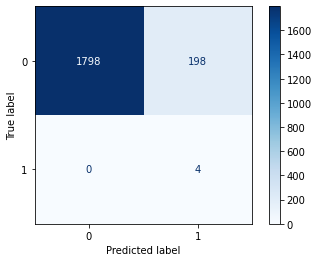

In [38]:
mlp_clf = MLPClassifier(solver='adam', learning_rate='constant', hidden_layer_sizes=(80,), alpha=0.0001, activation='tanh', random_state=SEED_VAL)

y_pred = create_classifier(mlp_clf, X_train_balanced_us_50, y_train_balanced_us_50, 
                          X_val, y_val)

print('Confusion Matrix: ')
plot_confusion_matrix(mlp_clf, X_val, y_val)

## Classification

### Balance dataset

In [45]:
X_train_balanced_40, y_train_balanced_40 = balance_dataset('oversampling', X_train, y_train, 0.667) # 40% fraud

print('40%:')
print('X_train.shape', X_train_balanced_40.shape)

40%:
X_train.shape (9965, 28)


### Normalize data for Naive Bayes

In [52]:
scaler = MinMaxScaler()

X_train_balanced_40_normalized = scaler.fit(X_train_balanced_40).transform(X_train_balanced_40)
X_test_normalized = scaler.fit(X_test).transform(X_test)

### Classificate

#### Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1988
           1       1.00      0.67      0.80        12

    accuracy                           1.00      2000
   macro avg       1.00      0.83      0.90      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


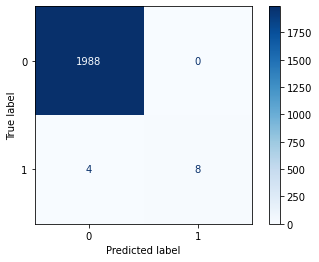

In [53]:
nb_clf = MultinomialNB(alpha=1)

y_pred = create_classifier(nb_clf, X_train_balanced_40_normalized, y_train_balanced_40, 
                          X_test_normalized, y_test)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_test_normalized, y_test)

#### Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1988
           1       1.00      0.83      0.91        12

    accuracy                           1.00      2000
   macro avg       1.00      0.92      0.95      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


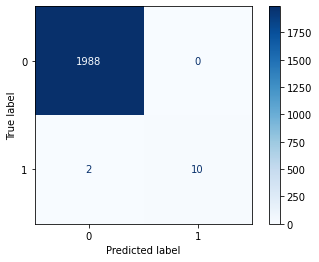

In [54]:
svm_clf = SVC(kernel='poly', C=10, random_state=SEED_VAL)

y_pred = create_classifier(svm_clf, X_train_balanced_40, y_train_balanced_40, 
                          X_test, y_test)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_test, y_test)

#### Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1988
           1       1.00      0.83      0.91        12

    accuracy                           1.00      2000
   macro avg       1.00      0.92      0.95      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


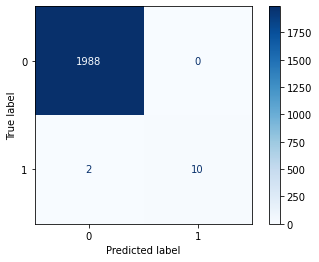

In [55]:
rf_clf = RandomForestClassifier(n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features='auto', max_depth=100, criterion='entropy', random_state=SEED_VAL)

y_pred = create_classifier(rf_clf, X_train_balanced_40, y_train_balanced_40, 
                          X_test, y_test)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_test, y_test)

#### Multilayer Perceptron

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1988
           1       0.91      0.83      0.87        12

    accuracy                           1.00      2000
   macro avg       0.95      0.92      0.93      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


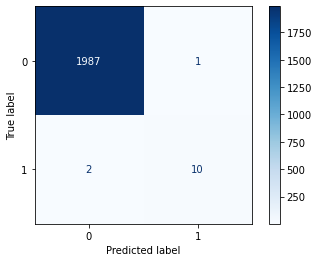

In [56]:
mlp_clf = MLPClassifier(solver='adam', learning_rate='constant', hidden_layer_sizes=(80,), alpha=0.0001, activation='tanh', random_state=SEED_VAL)

y_pred = create_classifier(mlp_clf, X_train_balanced_40, y_train_balanced_40, 
                          X_test, y_test)

print('Confusion Matrix: ')
plot_confusion_matrix(mlp_clf, X_test, y_test)